# About Dataset¶
## Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

## Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

## Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster  
from sklearn.cluster import AgglomerativeClustering


In [5]:
# load dataset
df = pd.read_csv('../../dataset/Mall_Customers_Clustering.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
# check for missing value
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Create x
X = df.iloc[:,[3, 4]].values

## Using the dendrogram method to find out the optimal number of cluster

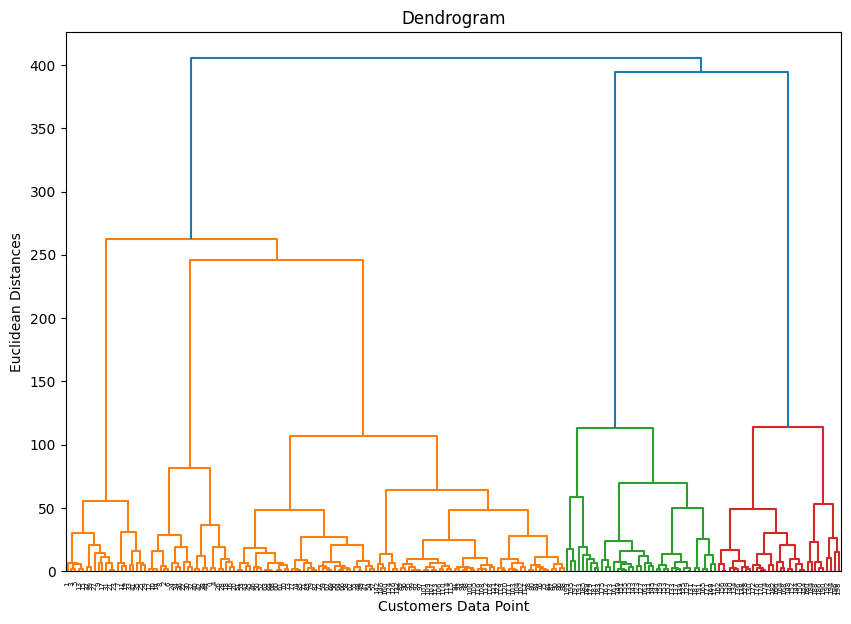

In [27]:
# Generate linkage matrix
linkage_matrix  = linkage(X, metric="euclidean", method="ward")

# Plot dendrogram
plt.subplots(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Customers Data Point")
plt.ylabel("Euclidean Distances")
plt.show();

In [28]:
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

## Training the Hierarchical Clustering model on the dataset

In [25]:
model = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
y = model.fit_predict(X)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

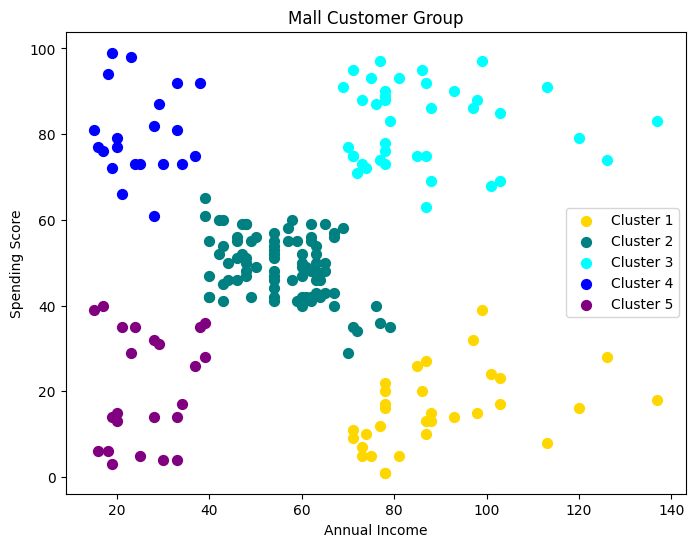

In [26]:
# Visualizing all clusters and their centroids
plt.subplots(figsize=(8, 6))

colors = ['gold', 'teal', 'cyan', 'blue', 'purple']

for i in range(0, 5):
    cluster_count = i + 1
    plt.scatter(X[y==i, 0], X[y==i, 1], s=50, c=colors[i], label=f"Cluster {cluster_count}")

# plt.scatter(X[y==0, 0], X[y==0, 1], s=50, c="green", label="Cluster 1")
# plt.scatter(X[y==1, 0], X[y==1, 1], s=50, c="teal", label="Cluster 2")
# plt.scatter(X[y==2, 0], X[y==2, 1], s=50, c="cyan", label="Cluster 3")
# plt.scatter(X[y==3, 0], X[y==3, 1], s=50, c="blue", label="Cluster 4")
# plt.scatter(X[y==4, 0], X[y==4, 1], s=50, c="yellow", label="Cluster 5")
plt.title("Mall Customer Group")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show();